In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Machine learning libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [2]:
# Load dataset
df = pd.read_csv("/content/Housing.csv")

# Display first 5 rows
print(df.head())

# Check dataset info
print(df.info())

# Check for missing values
print(df.isnull().sum())


      price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0  13300000  7420         4          2        3      yes        no       no   
1  12250000  8960         4          4        4      yes        no       no   
2  12250000  9960         3          2        2      yes        no      yes   
3  12215000  7500         4          2        2      yes        no      yes   
4  11410000  7420         4          1        2      yes       yes      yes   

  hotwaterheating airconditioning  parking prefarea furnishingstatus  
0              no             yes        2      yes        furnished  
1              no             yes        3       no        furnished  
2              no              no        2      yes   semi-furnished  
3              no             yes        3      yes        furnished  
4              no             yes        2       no        furnished  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 colu

In [4]:
# Multiple Linear Regression
X = df[['area', 'bedrooms', 'bathrooms']]   # independent variables
y = df['price']                             # dependent variable

In [5]:
# Simple Linear Regression example
X_simple = df[['area']]
y_simple = df['price']


In [12]:
# Multiple Linear Regression
#Split Data into Train and Test Sets 80% training, 20% testing
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [10]:
#For simple regression
X_train_s, X_test_s, y_train_s, y_test_s = train_test_split(
    X_simple, y_simple, test_size=0.2, random_state=42
)


In [13]:
# Multiple Linear Regression
model = LinearRegression()

# Train model
model.fit(X_train, y_train)


LinearRegression()

In [14]:
#For simple regression
model_simple = LinearRegression()
model_simple.fit(X_train_s, y_train_s)


LinearRegression()

In [15]:
y_pred = model.predict(X_test)

# Print predictions
print("Predicted values:")
print(y_pred)


Predicted values:
[6383168.05981192 6230250.35140428 3597885.28090091 4289730.8386382
 3930445.60575177 4883933.33918115 5505773.16533075 6068793.48103629
 3321512.02483442 3495157.72744705 8731338.12527607 3561265.8244721
 3487335.97847431 3633344.35548029 3933900.2714526  6661080.95290716
 2893133.47793136 4635197.40872131 4583377.42320885 4274999.75826381
 4296640.17003986 4920207.32903988 3462807.85199841 3875170.95453847
 5412497.19140831 7425564.68389184 3269692.03932195 5021117.35611339
 7122556.71331971 3238600.04801447 5366583.9261965  3640253.68688195
 6057517.06636272 4847659.34932243 4572198.51082701 5573863.86824637
 4167435.67282878 4021179.33154444 3764621.65211187 5307730.62714319
 5319221.21748587 3456243.98716683 6202613.02579763 4013357.58257171
 4534099.68582614 4235271.10270425 6057517.06636272 4525560.52386579
 4983206.22693419 3238600.04801447 6567080.25723531 3238600.04801447
 4886475.58731091 4116997.55359665 4180093.95378268 3567705.7071645
 5971150.42384195 3

In [16]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Model Evaluation:")
print("MAE:", mae)
print("MSE:", mse)
print("R² Score:", r2)


Model Evaluation:
MAE: 1265275.6699454375
MSE: 2750040479309.0522
R² Score: 0.4559299118872445


In [17]:
print("Intercept:", model.intercept_)
print("Coefficients:", model.coef_)

# Feature importance
coeff_df = pd.DataFrame(model.coef_, X.columns, columns=['Coefficient'])
print(coeff_df)


Intercept: 59485.379208717495
Coefficients: [3.45466570e+02 3.60197650e+05 1.42231966e+06]
            Coefficient
area       3.454666e+02
bedrooms   3.601977e+05
bathrooms  1.422320e+06


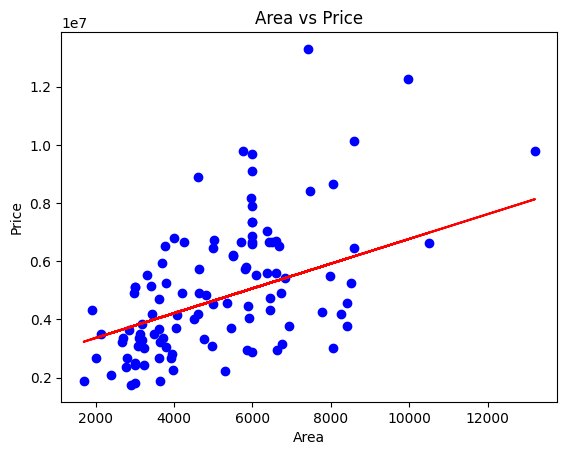

In [18]:
plt.scatter(X_test_s, y_test_s, color='blue')
plt.plot(X_test_s, model_simple.predict(X_test_s), color='red')

plt.title("Area vs Price")
plt.xlabel("Area")
plt.ylabel("Price")

plt.show()


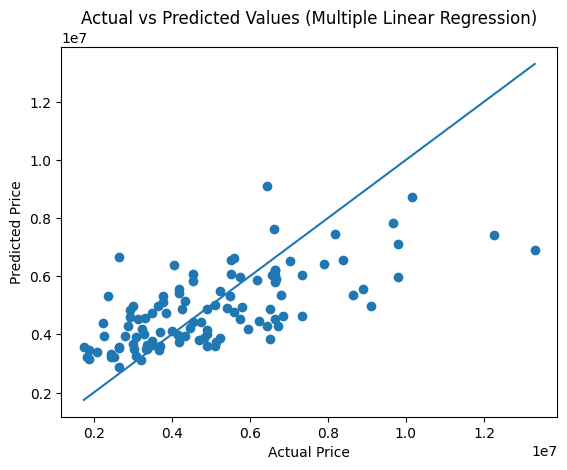

In [19]:
# Predict values
y_pred = model.predict(X_test)

# Plot
plt.scatter(y_test, y_pred)

# Reference line (perfect prediction line)
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()])

plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted Values (Multiple Linear Regression)")

plt.show()
